cause_group                 accidents  engineering work  external  \
time_of_day                                                         
night (00:00-6:00)                 47                58        22   
morning_peak (6:00-9:00)           54                30        45   
morning (9:00-12:00)               85                36        92   
afternoon (12:00-16:00)            92                35       160   
evening_peak (16:00-19:00)         74                18       154   
evening (19:00-00:00)             187                25       158   

cause_group                 infrastructure  logistical  rolling stock  staff  \
time_of_day                                                                    
night (00:00-6:00)                     117          27             53    129   
morning_peak (6:00-9:00)               229          47            338     42   
morning (9:00-12:00)                   195          28            333     40   
afternoon (12:00-16:00)                291     

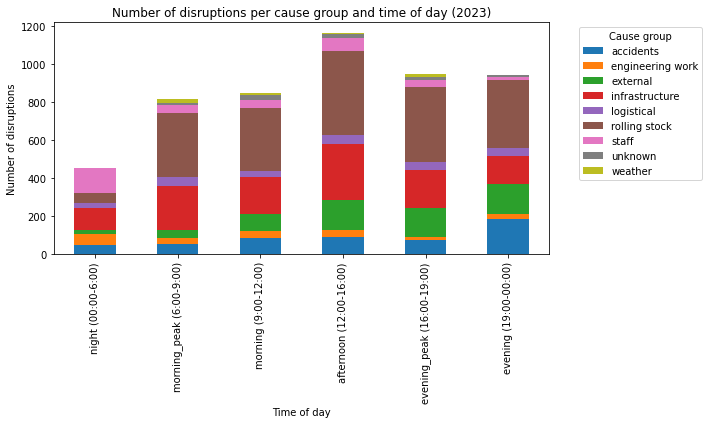

In [2]:
import pandas as pd

df = pd.read_csv("disruptions-2023.csv")

df["start_time"] = pd.to_datetime(df["start_time"], errors="coerce")

df = df.dropna(subset=["start_time"])

def classify_time_of_day(hour):
    if 6 <= hour < 9:
        return "morning_peak (6:00-9:00)"
    elif 9 <= hour < 12:
        return "morning (9:00-12:00)"
    elif 12 <= hour < 16:
        return "afternoon (12:00-16:00)"
    elif 16 <= hour < 19:
        return "evening_peak (16:00-19:00)"
    elif 19 <= hour < 24:
        return "evening (19:00-00:00)"
    else:
        return "night (00:00-6:00)"

df["time_of_day"] = df["start_time"].dt.hour.apply(classify_time_of_day)

cause_by_time = df.groupby(["time_of_day", "cause_group"]).size().unstack(fill_value=0)

order = [
    "night (00:00-6:00)",
    "morning_peak (6:00-9:00)",
    "morning (9:00-12:00)",
    "afternoon (12:00-16:00)",
    "evening_peak (16:00-19:00)",
    "evening (19:00-00:00)"
]
cause_by_time = cause_by_time.reindex(order)

print(cause_by_time)

import matplotlib.pyplot as plt

cause_by_time.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Number of disruptions per cause group and time of day (2023)")
plt.xlabel("Time of day")
plt.ylabel("Number of disruptions")
plt.legend(title="Cause group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()